# Dataset Information:
The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

## Dataset: 
### License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

Variables Information:¶
fLength Feature Continuous major axis of ellipse mm no

fWidth Feature Continuous minor axis of ellipse mm no

fSize Feature Continuous 10-log of sum of content of all pixels #phot no

fConc Feature Continuous ratio of sum of two highest pixels over fSize no

fConc1 Feature Continuous ratio of highest pixel over fSize no

fAsym Feature Continuous distance from highest pixel to center, projected onto major axis no

fM3Long Feature Continuous 3rd root of third moment along major axis mm no

fM3Trans Feature Continuous 3rd root of third moment along minor axis mm no

fAlpha Feature Continuous angle of major axis with vector to origin deg no

fDist Feature Continuous distance from origin to center of ellipse mm no

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df=pd.read_csv('magic04.data', names=cols)

In [3]:
# To see the unique classes
df['class']. unique()

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class']=='g').astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

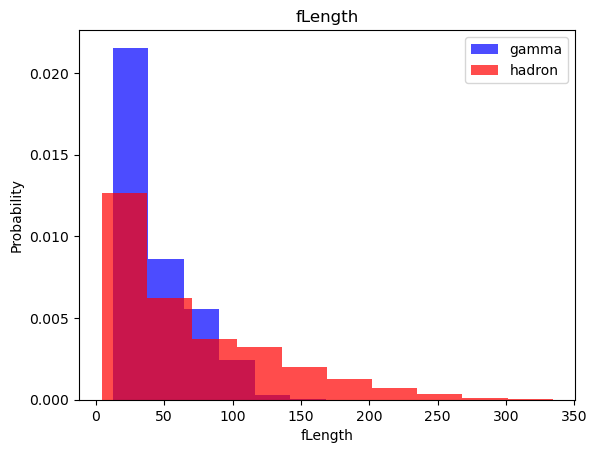

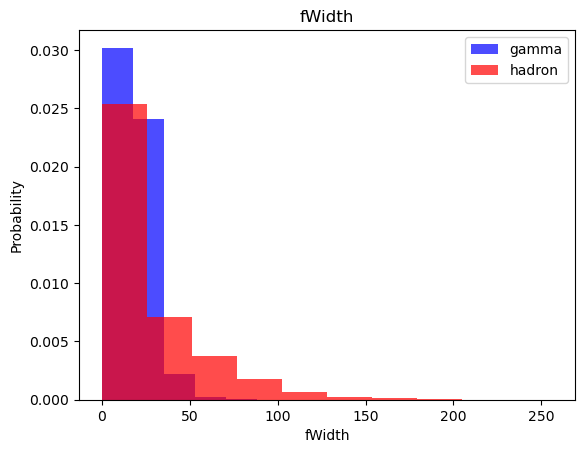

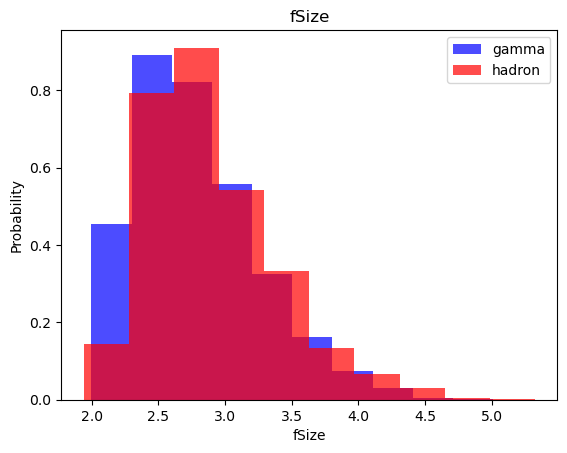

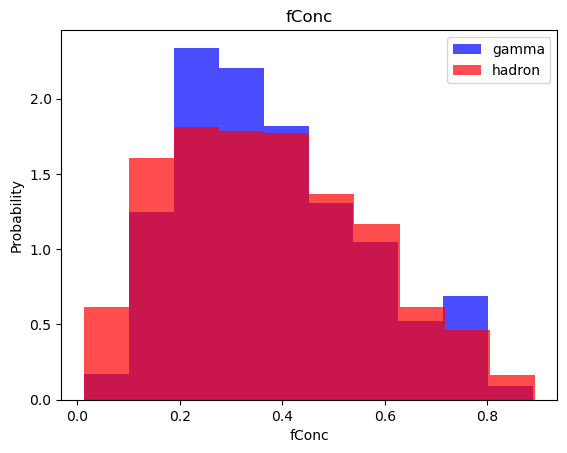

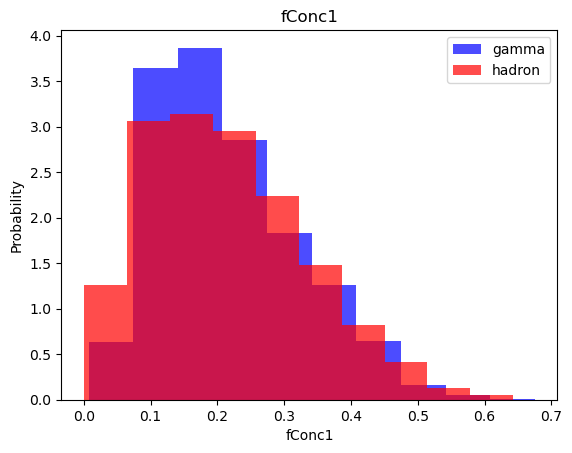

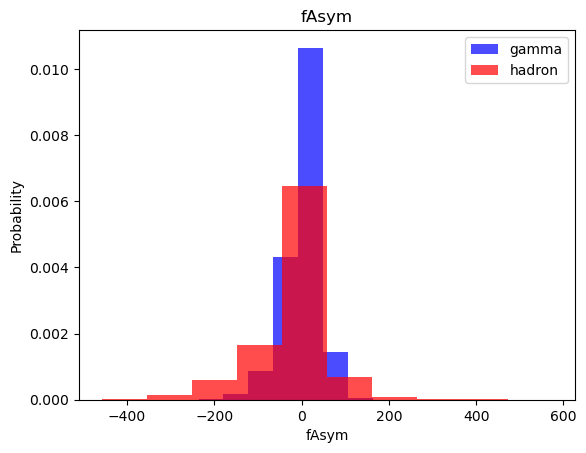

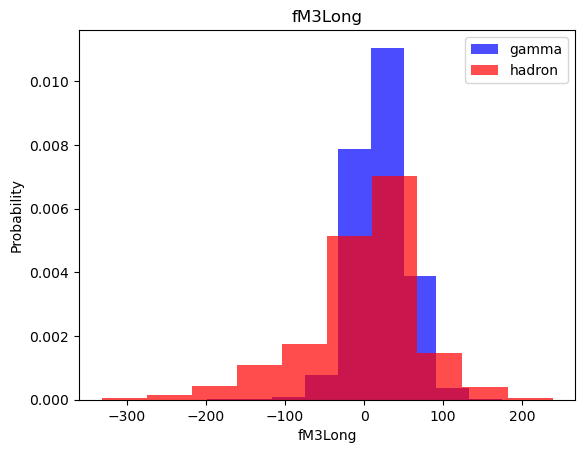

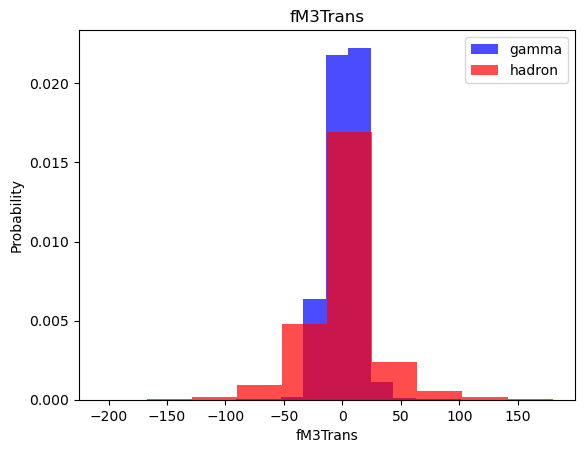

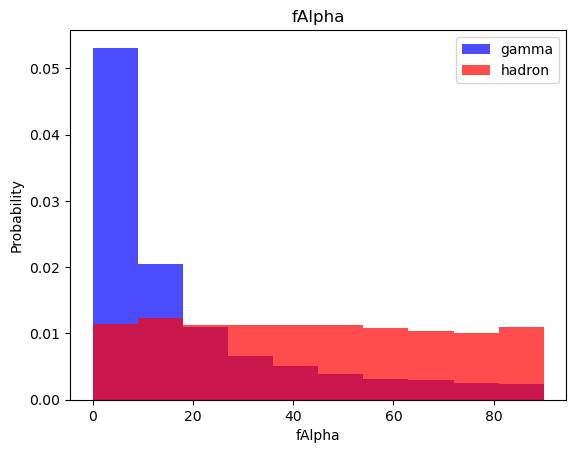

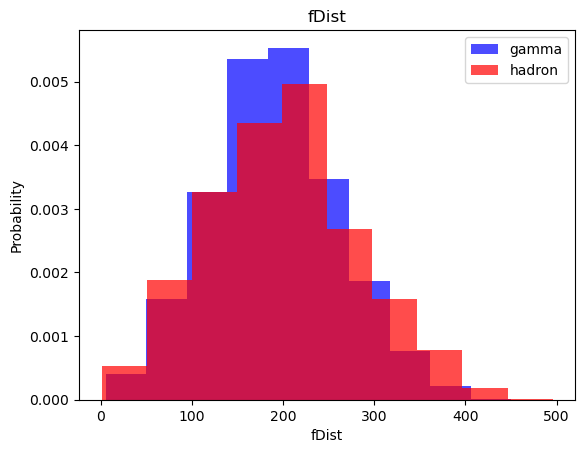

In [6]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1] [label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0] [label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
    data = np.hstack((X, np.reshape(y, (-1,1))))
    return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [10]:
sum((y_train==1))

7468

In [11]:
sum((y_train==0))

7468

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [14]:
KNN_y_hat = knn_model.predict(X_test)
KNN_y_hat

array([1, 1, 0, ..., 0, 0, 0])

In [15]:
y_test

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
print(accuracy_score(y_test,KNN_y_hat))

0.8046792849631966


In [17]:
print(classification_report(y_test, KNN_y_hat))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1374
           1       0.82      0.89      0.85      2430

    accuracy                           0.80      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()

In [20]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [21]:
nb_y_hat = nb_model.predict(X_test)
nb_y_hat

array([1, 1, 1, ..., 0, 1, 0])

In [22]:
print(classification_report(nb_y_hat, y_test))

              precision    recall  f1-score   support

           0       0.39      0.69      0.50       784
           1       0.90      0.72      0.80      3020

    accuracy                           0.72      3804
   macro avg       0.65      0.71      0.65      3804
weighted avg       0.80      0.72      0.74      3804



In [23]:
print(accuracy_score(y_test,nb_y_hat))

0.7166140904311251


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression()

In [26]:
lr_model

LogisticRegression()

In [27]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
lr_y_hat = lr_model.predict(X_test)
lr_y_hat

array([0, 1, 1, ..., 0, 1, 0])

In [29]:
print(classification_report(y_test, lr_y_hat))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1374
           1       0.83      0.82      0.82      2430

    accuracy                           0.77      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.77      0.77      3804



In [30]:
print(accuracy_score(y_test,lr_y_hat))

0.7744479495268138


# SVM

In [31]:
from sklearn.svm import SVC

In [32]:
svm_model = SVC()

In [33]:
svm_model.fit(X_train, y_train)

SVC()

In [34]:
svm_y_hat = svm_model.predict(X_test)

In [35]:
print(classification_report(y_test, svm_y_hat))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1374
           1       0.88      0.90      0.89      2430

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [36]:
print(accuracy_score(y_test,lr_y_hat))

0.7744479495268138


# NN

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [122]:
def plot_loss(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Model Loss')
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.show()

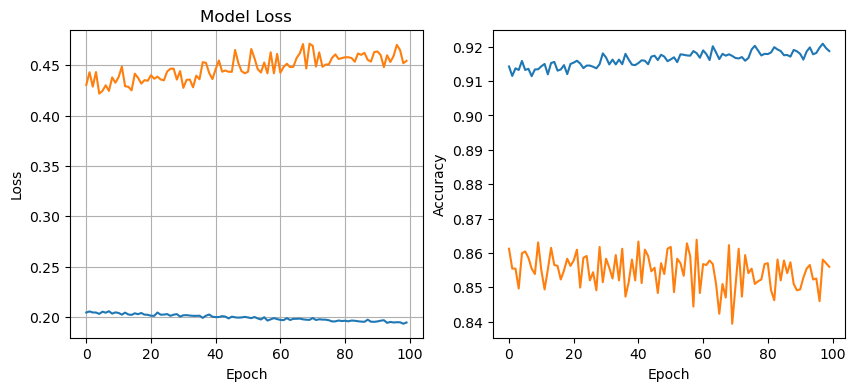

In [123]:
plot_loss(history)

In [144]:
def train_model(X_train, y_train, epochs, num_nodes, lr, dropout_prob, batch_size):
    nn_model = tf.keras.Sequential ([ 
        layers.Dense(num_nodes, activation ='relu', input_shape=(10,)),
        layers.Dropout(dropout_prob),
        layers.Dense(num_nodes, activation ='relu'),
        layers.Dropout(dropout_prob),
        layers.Dense(1, activation ='sigmoid')
    ])
    
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

 nodes 16, dropout 0, lr 0.01, batchsize 32


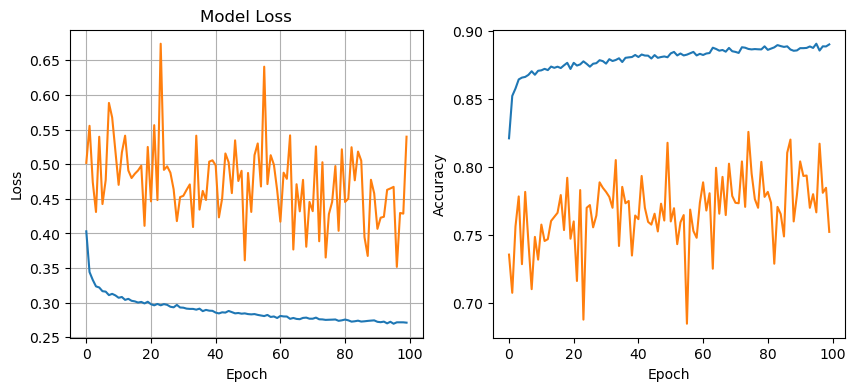

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.8615 - loss: 0.3504
 nodes 16, dropout 0, lr 0.01, batchsize 64


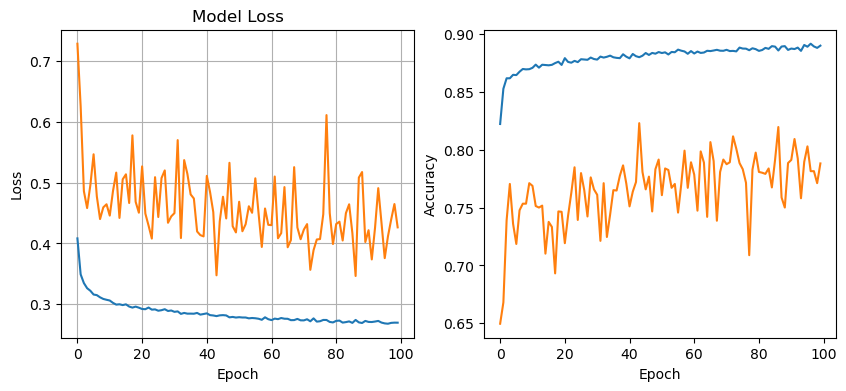

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.8543 - loss: 0.3397
 nodes 16, dropout 0, lr 0.01, batchsize 128


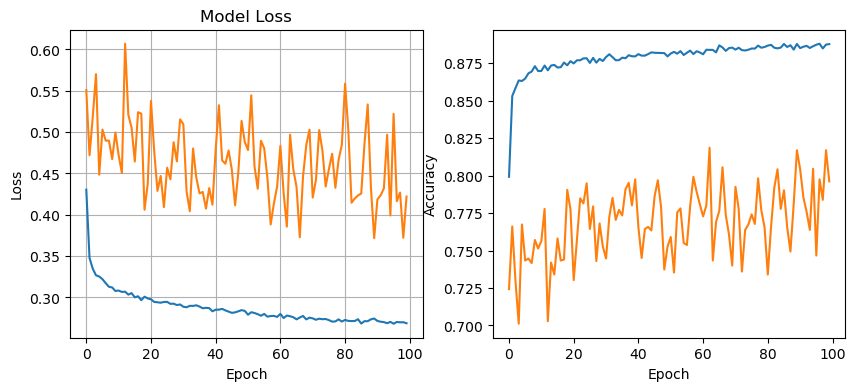

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.8573 - loss: 0.3545
 nodes 16, dropout 0.2, lr 0.01, batchsize 32


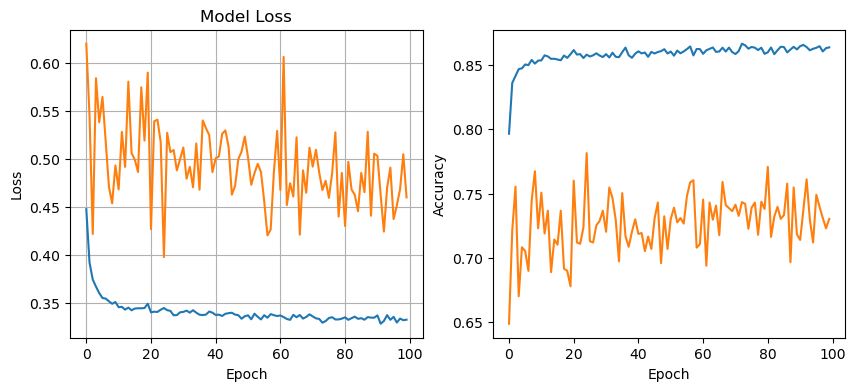

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8548 - loss: 0.3342
 nodes 16, dropout 0.2, lr 0.01, batchsize 64


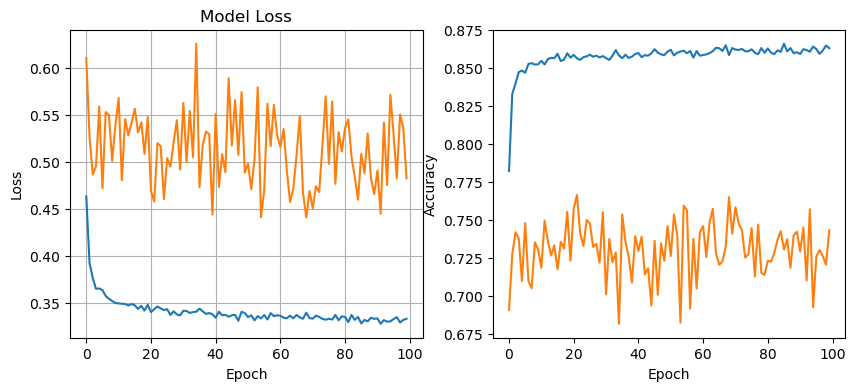

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8569 - loss: 0.3308
 nodes 16, dropout 0.2, lr 0.01, batchsize 128


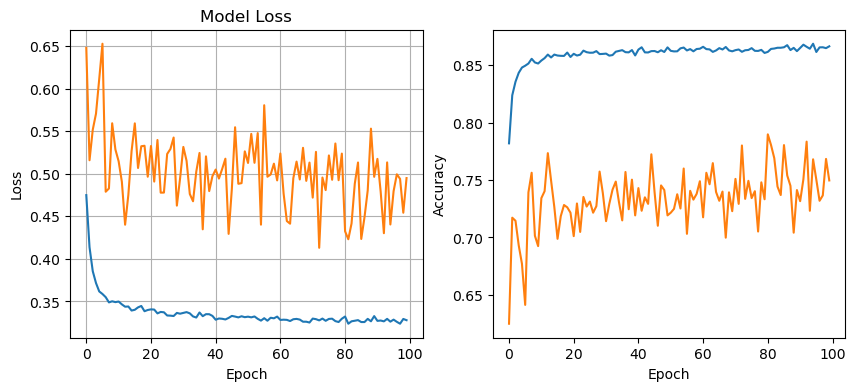

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8574 - loss: 0.3238
 nodes 16, dropout 0, lr 0.005, batchsize 32


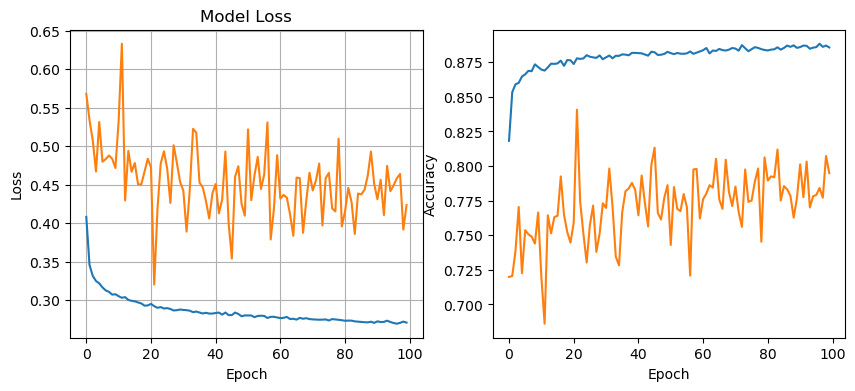

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.8543 - loss: 0.3594
 nodes 16, dropout 0, lr 0.005, batchsize 64


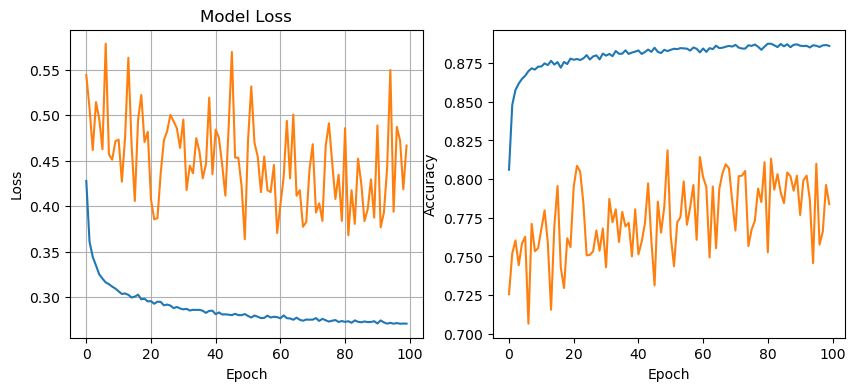

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.8615 - loss: 0.3422
 nodes 16, dropout 0, lr 0.005, batchsize 128


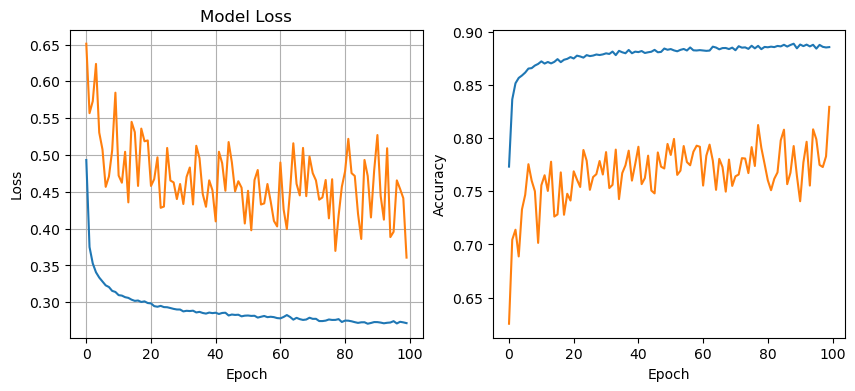

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - accuracy: 0.8540 - loss: 0.3517
 nodes 16, dropout 0.2, lr 0.005, batchsize 32


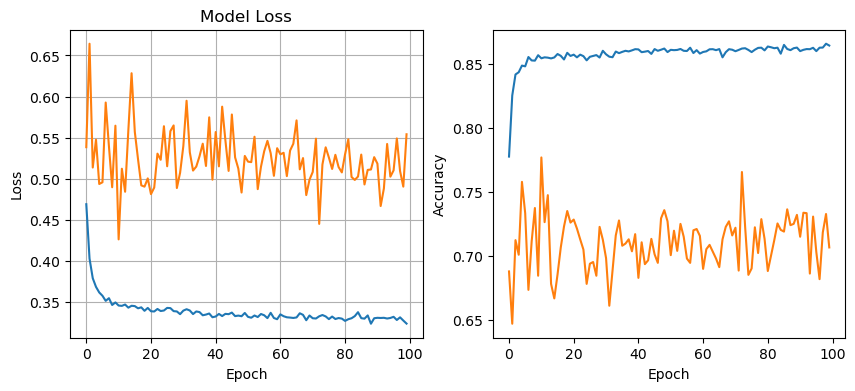

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.8569 - loss: 0.3287
 nodes 16, dropout 0.2, lr 0.005, batchsize 64


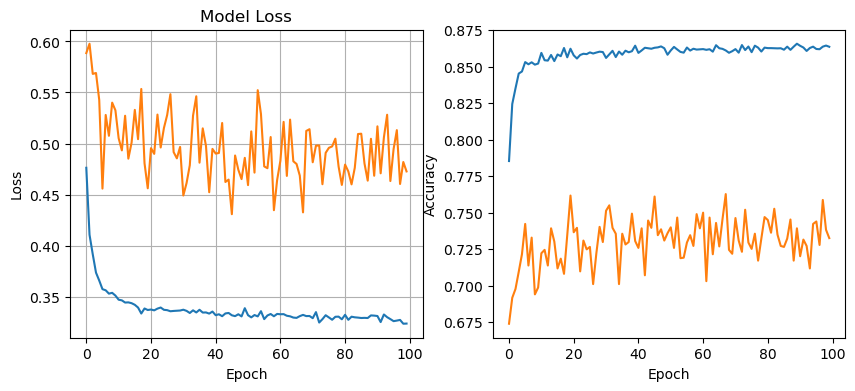

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8551 - loss: 0.3316
 nodes 16, dropout 0.2, lr 0.005, batchsize 128


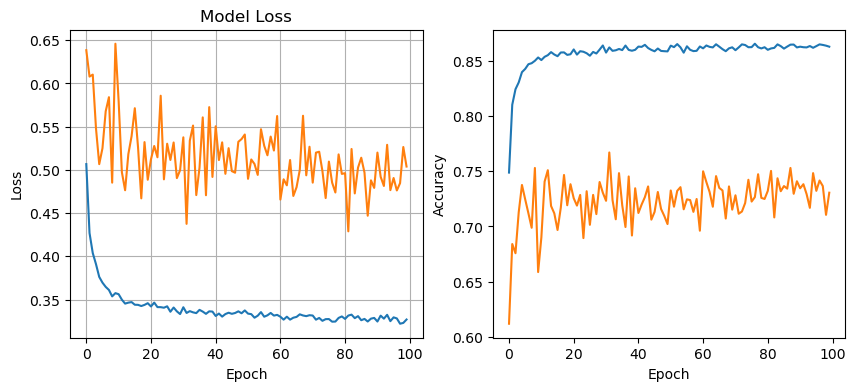

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.8586 - loss: 0.3265
 nodes 16, dropout 0, lr 0.001, batchsize 32


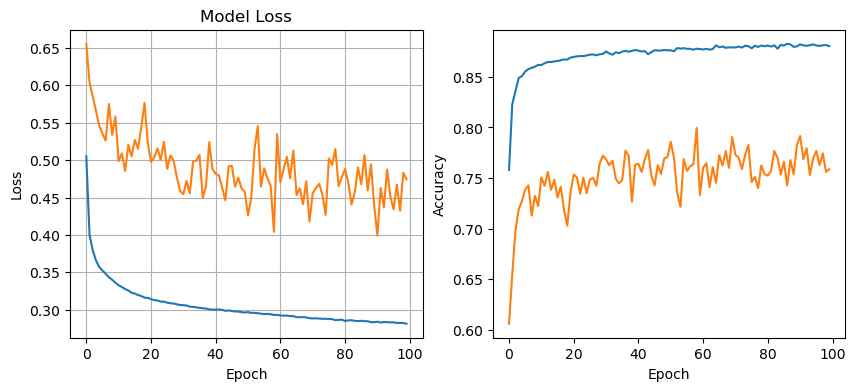

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.8660 - loss: 0.3309
 nodes 16, dropout 0, lr 0.001, batchsize 64


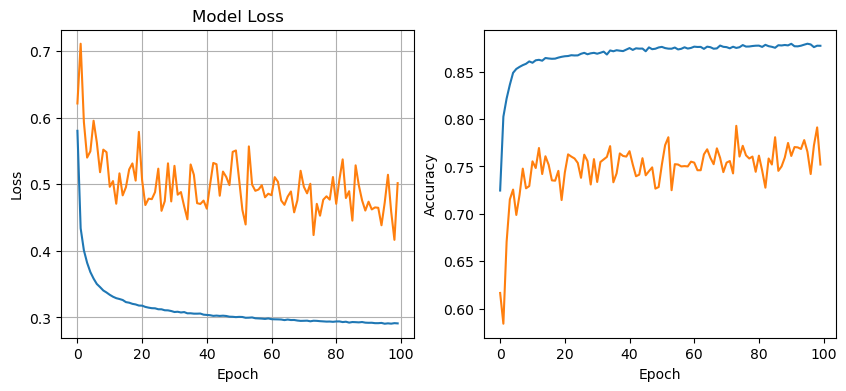

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8577 - loss: 0.3418
 nodes 16, dropout 0, lr 0.001, batchsize 128


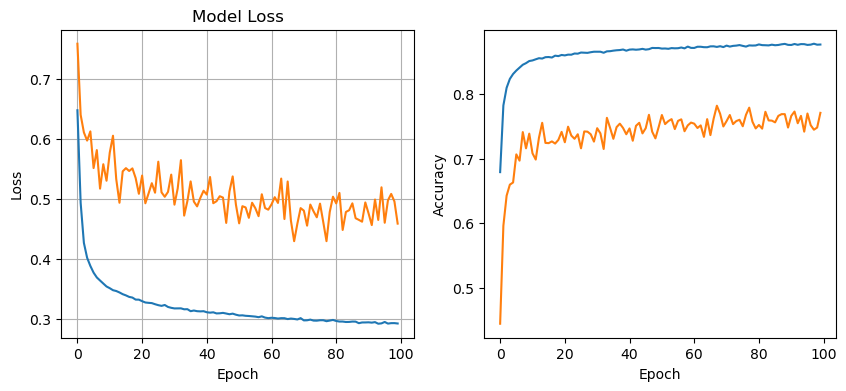

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8572 - loss: 0.3322
 nodes 16, dropout 0.2, lr 0.001, batchsize 32


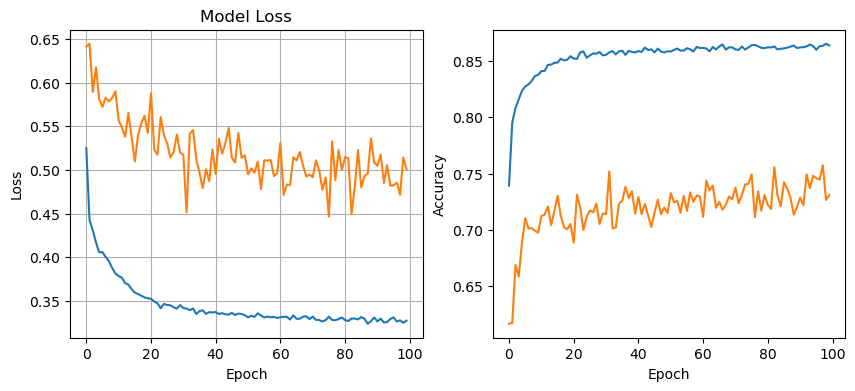

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.8585 - loss: 0.3284
 nodes 16, dropout 0.2, lr 0.001, batchsize 64


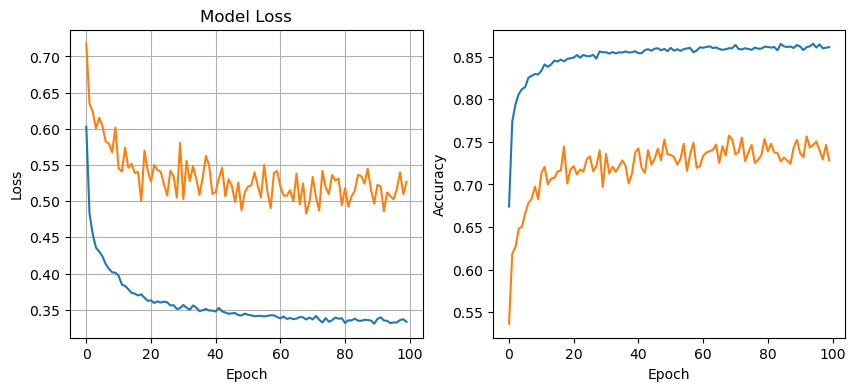

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8579 - loss: 0.3375
 nodes 16, dropout 0.2, lr 0.001, batchsize 128


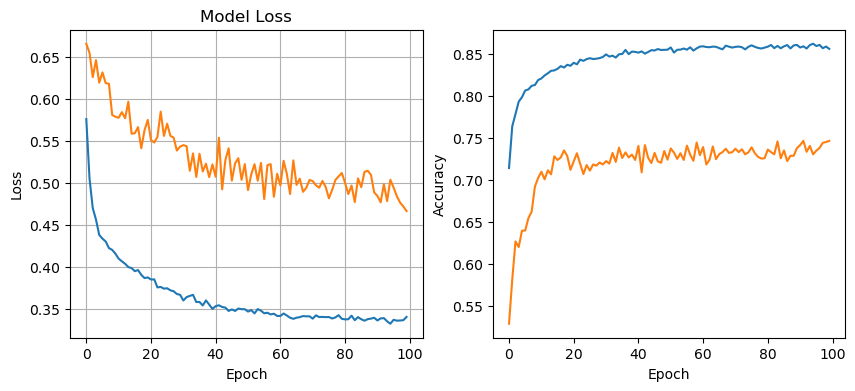

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.8511 - loss: 0.3367
 nodes 32, dropout 0, lr 0.01, batchsize 32


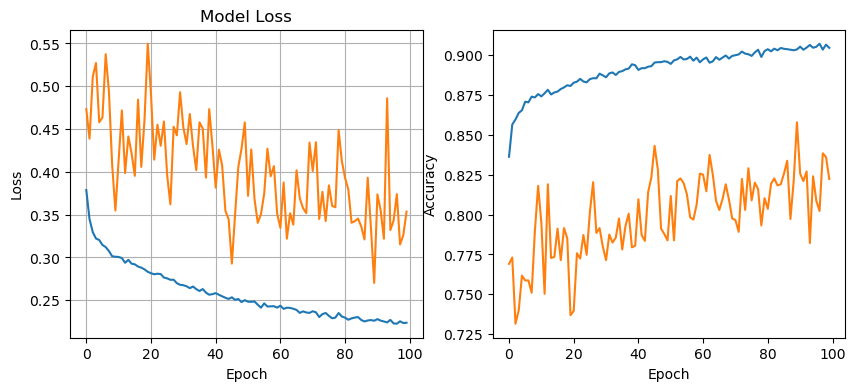

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.8537 - loss: 0.3955
 nodes 32, dropout 0, lr 0.01, batchsize 64


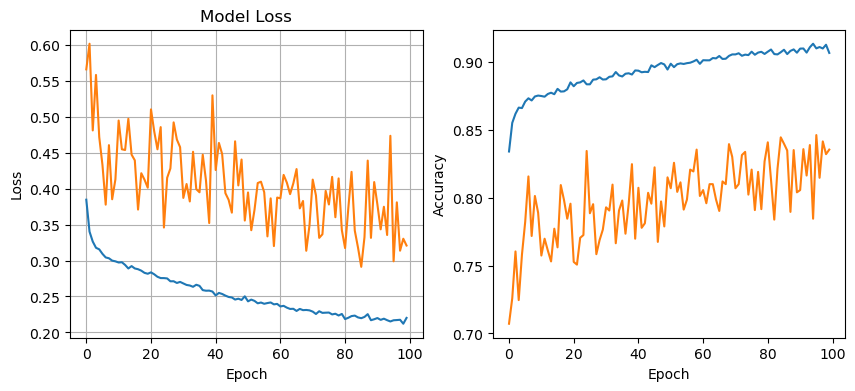

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8540 - loss: 0.4378
 nodes 32, dropout 0, lr 0.01, batchsize 128


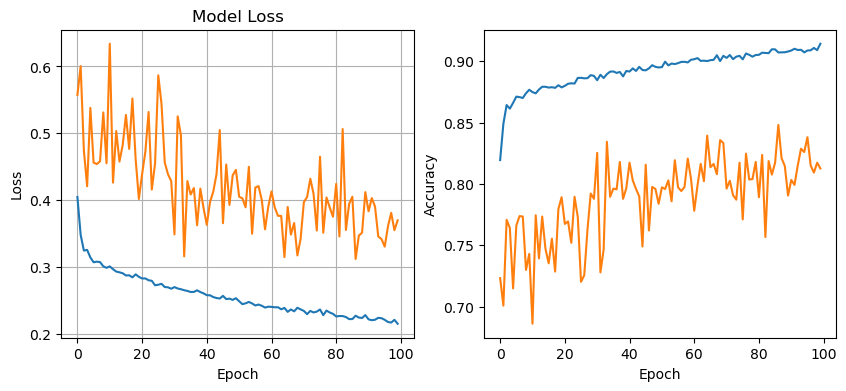

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8569 - loss: 0.3869
 nodes 32, dropout 0.2, lr 0.01, batchsize 32


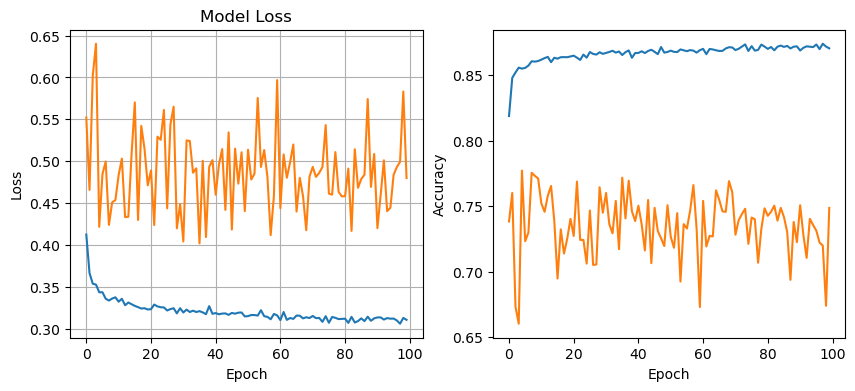

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.8586 - loss: 0.3280
 nodes 32, dropout 0.2, lr 0.01, batchsize 64


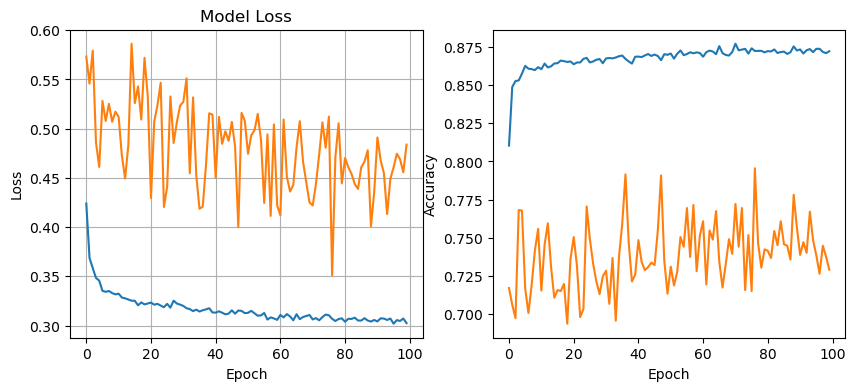

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.8616 - loss: 0.3256
 nodes 32, dropout 0.2, lr 0.01, batchsize 128


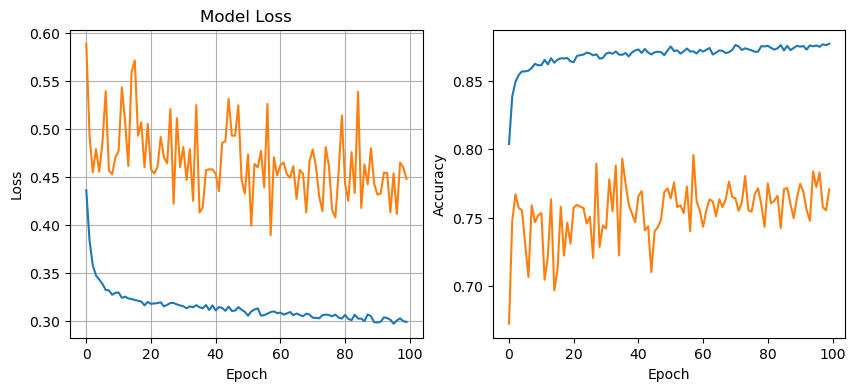

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.8644 - loss: 0.3173
 nodes 32, dropout 0, lr 0.005, batchsize 32


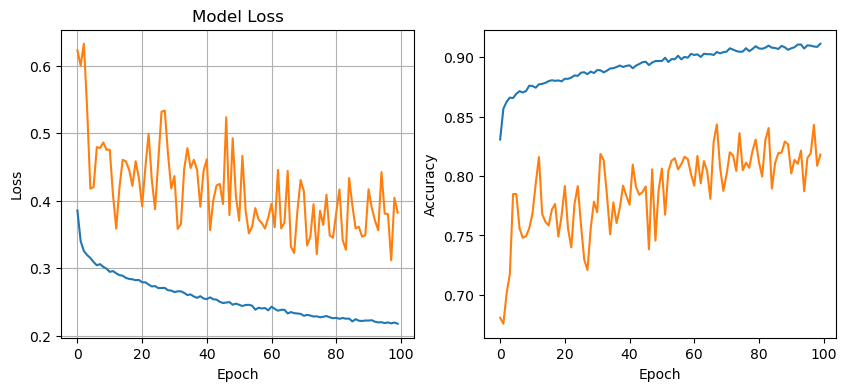

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.8578 - loss: 0.4025
 nodes 32, dropout 0, lr 0.005, batchsize 64


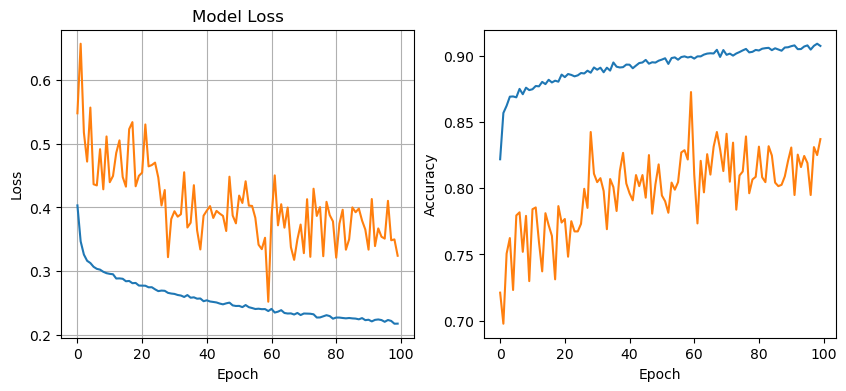

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.8537 - loss: 0.3957
 nodes 32, dropout 0, lr 0.005, batchsize 128


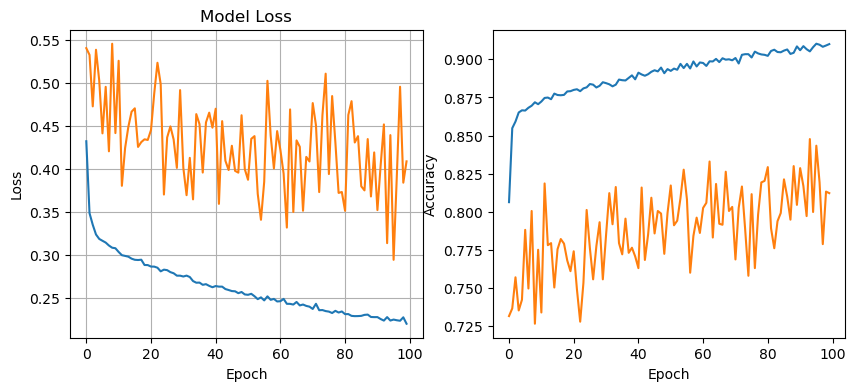

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.8545 - loss: 0.3836
 nodes 32, dropout 0.2, lr 0.005, batchsize 32


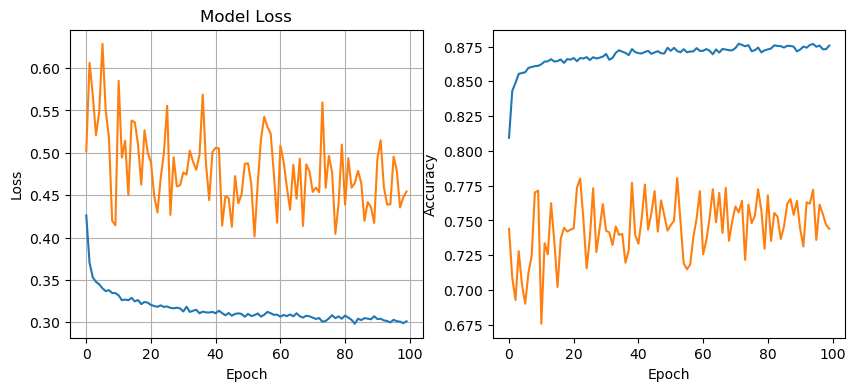

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8626 - loss: 0.3179
 nodes 32, dropout 0.2, lr 0.005, batchsize 64


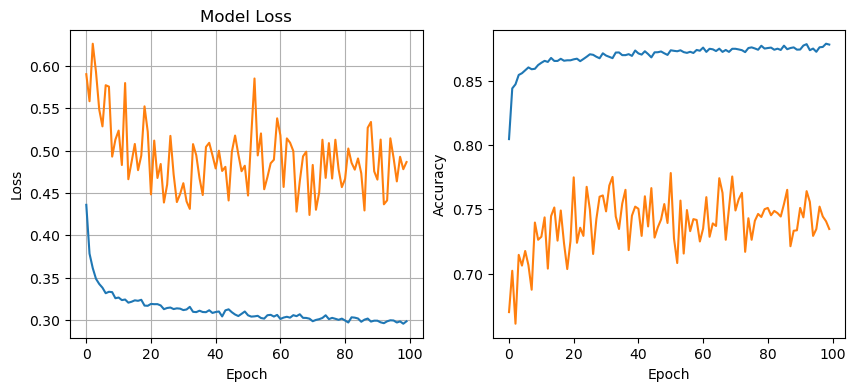

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8631 - loss: 0.3163
 nodes 32, dropout 0.2, lr 0.005, batchsize 128


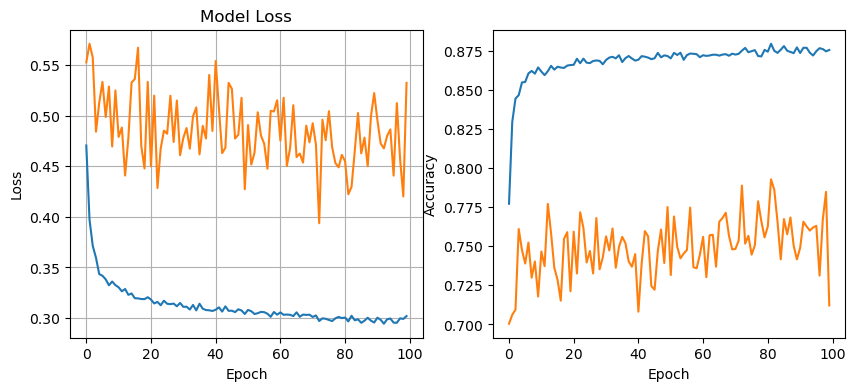

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.8570 - loss: 0.3244
 nodes 32, dropout 0, lr 0.001, batchsize 32


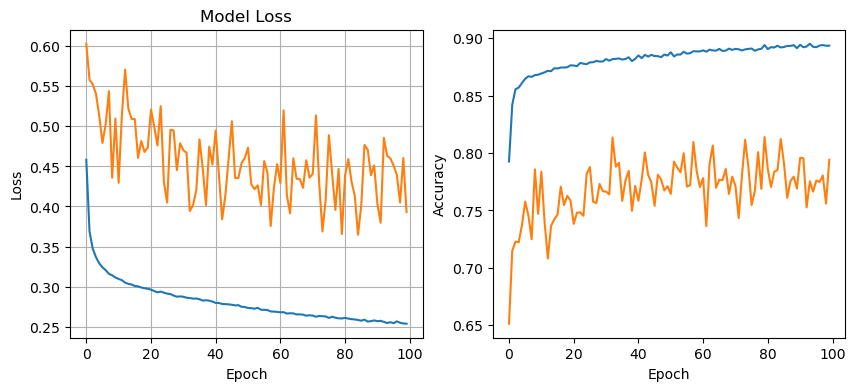

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.8582 - loss: 0.3441
 nodes 32, dropout 0, lr 0.001, batchsize 64


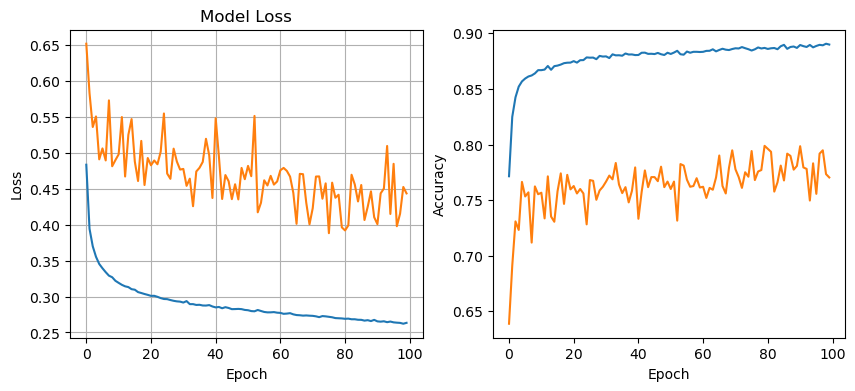

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.8686 - loss: 0.3288
 nodes 32, dropout 0, lr 0.001, batchsize 128


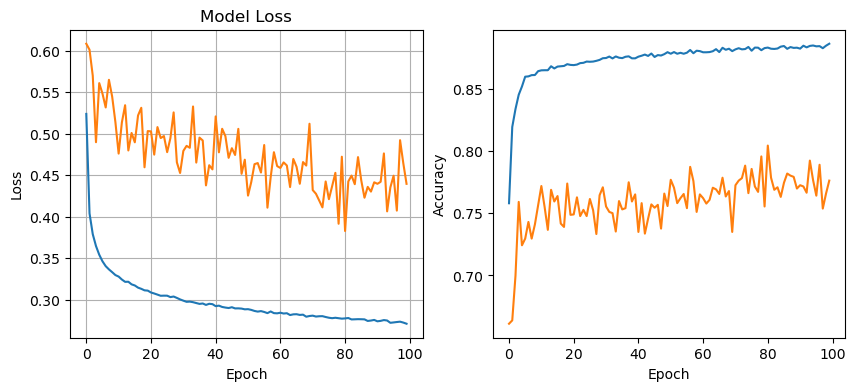

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8509 - loss: 0.3406
 nodes 32, dropout 0.2, lr 0.001, batchsize 32


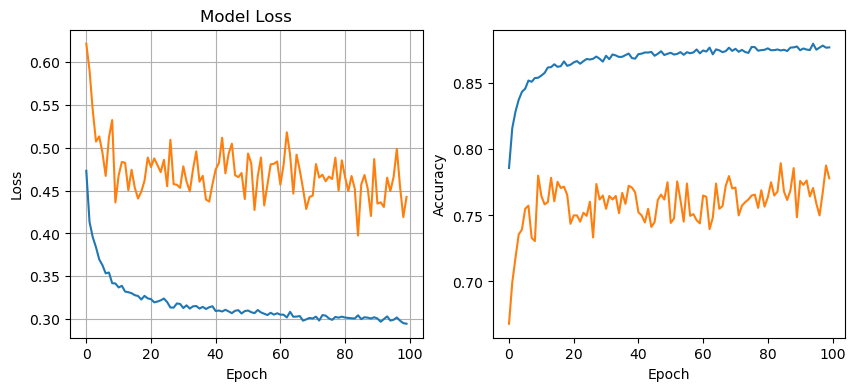

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8538 - loss: 0.3253
 nodes 32, dropout 0.2, lr 0.001, batchsize 64


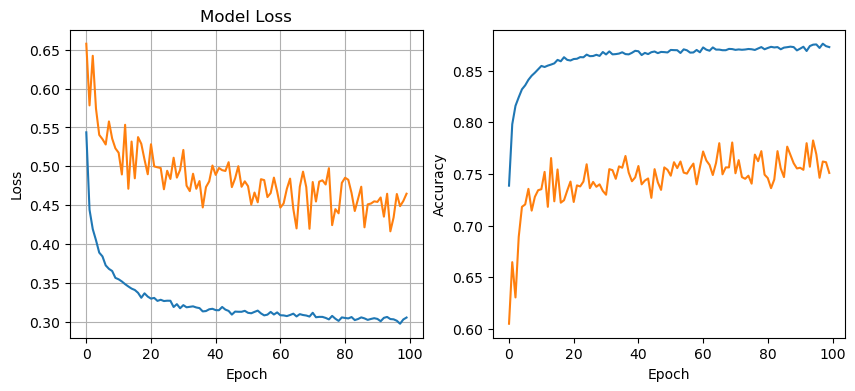

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.8619 - loss: 0.3180
 nodes 32, dropout 0.2, lr 0.001, batchsize 128


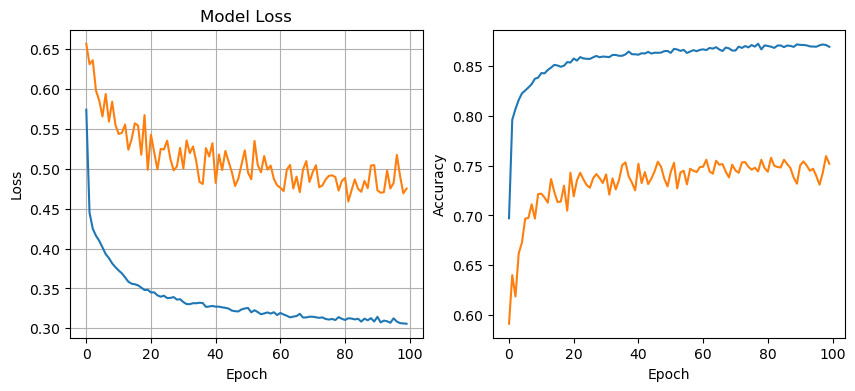

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.8584 - loss: 0.3249
 nodes 64, dropout 0, lr 0.01, batchsize 32


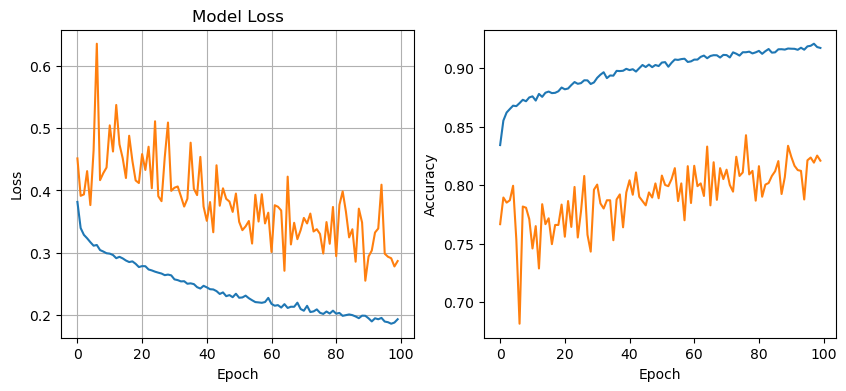

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.8474 - loss: 0.5768
 nodes 64, dropout 0, lr 0.01, batchsize 64


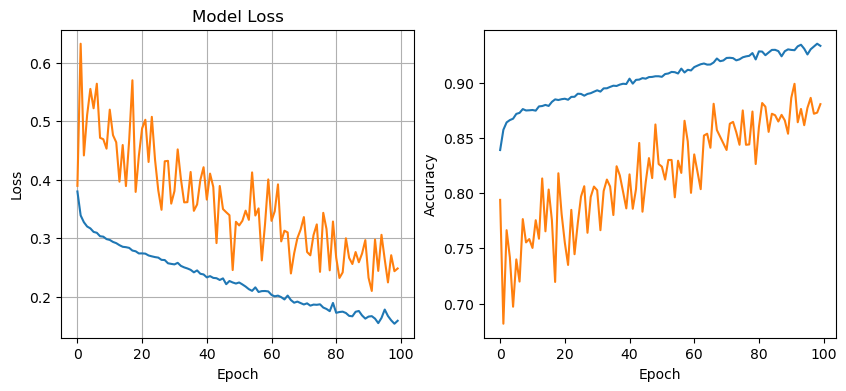

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.8509 - loss: 0.5837
 nodes 64, dropout 0, lr 0.01, batchsize 128


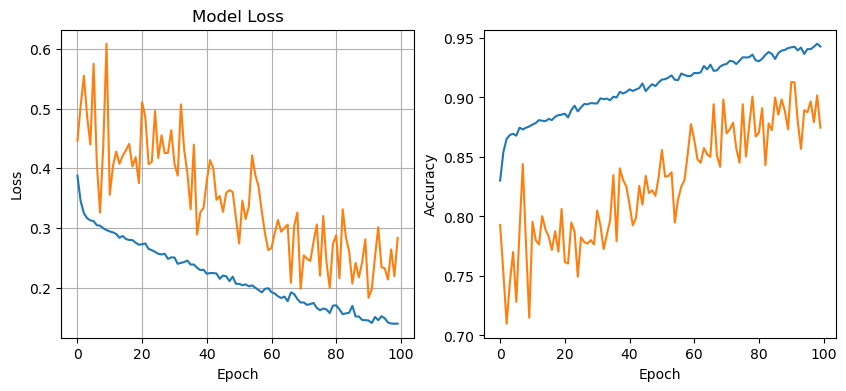

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.8480 - loss: 0.6007
 nodes 64, dropout 0.2, lr 0.01, batchsize 32


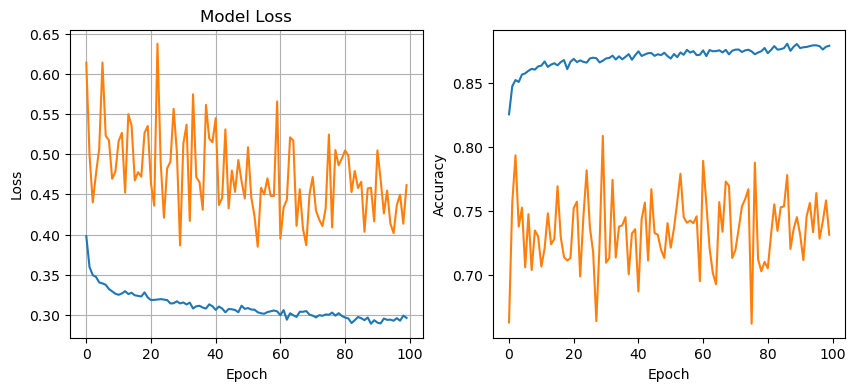

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8571 - loss: 0.3310
 nodes 64, dropout 0.2, lr 0.01, batchsize 64


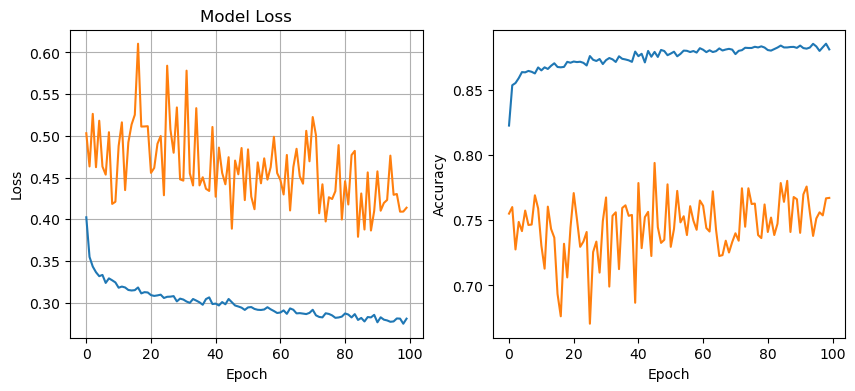

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.8713 - loss: 0.3264
 nodes 64, dropout 0.2, lr 0.01, batchsize 128


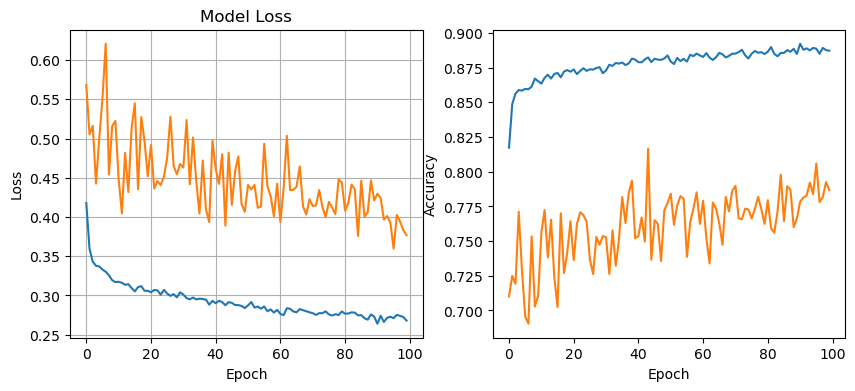

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.8680 - loss: 0.3136
 nodes 64, dropout 0, lr 0.005, batchsize 32


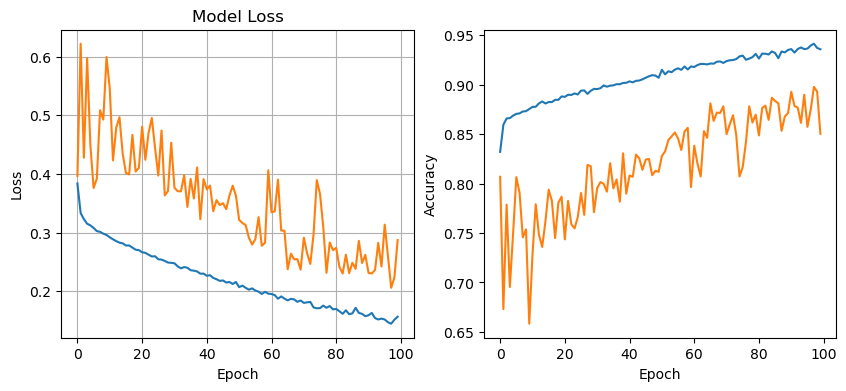

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8442 - loss: 0.6610
 nodes 64, dropout 0, lr 0.005, batchsize 64


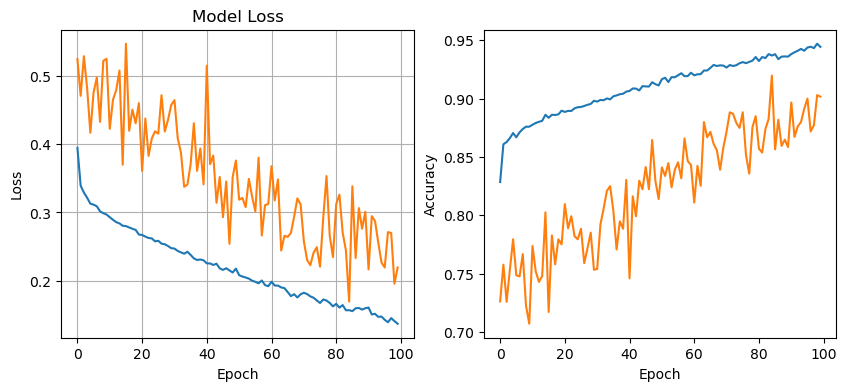

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8484 - loss: 0.5961
 nodes 64, dropout 0, lr 0.005, batchsize 128


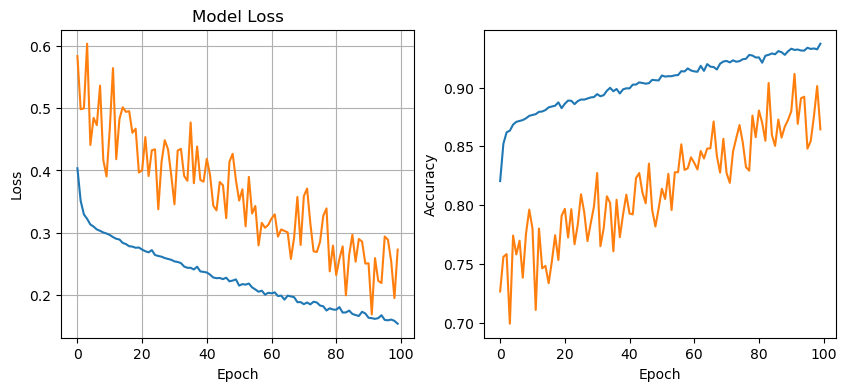

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8525 - loss: 0.5257
 nodes 64, dropout 0.2, lr 0.005, batchsize 32


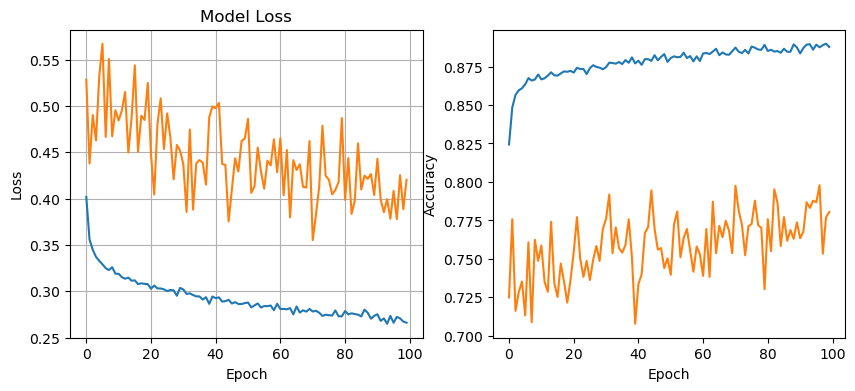

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.8685 - loss: 0.3241
 nodes 64, dropout 0.2, lr 0.005, batchsize 64


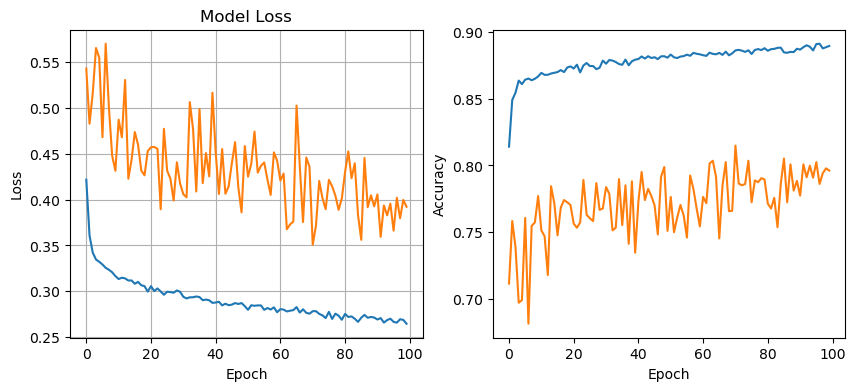

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.8618 - loss: 0.3203
 nodes 64, dropout 0.2, lr 0.005, batchsize 128


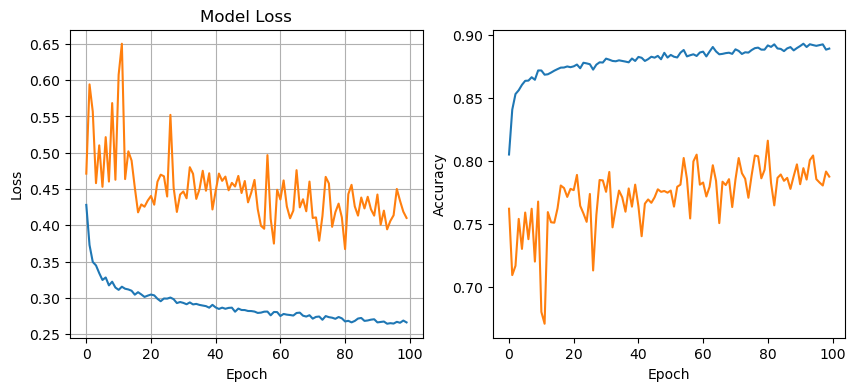

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8625 - loss: 0.3156
 nodes 64, dropout 0, lr 0.001, batchsize 32


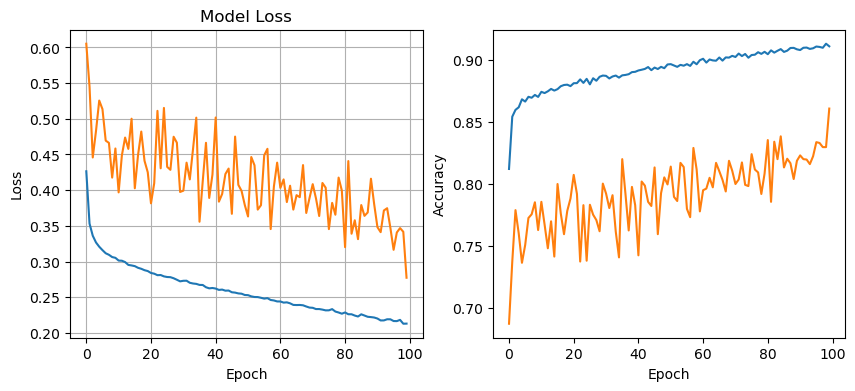

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.8564 - loss: 0.3786
 nodes 64, dropout 0, lr 0.001, batchsize 64


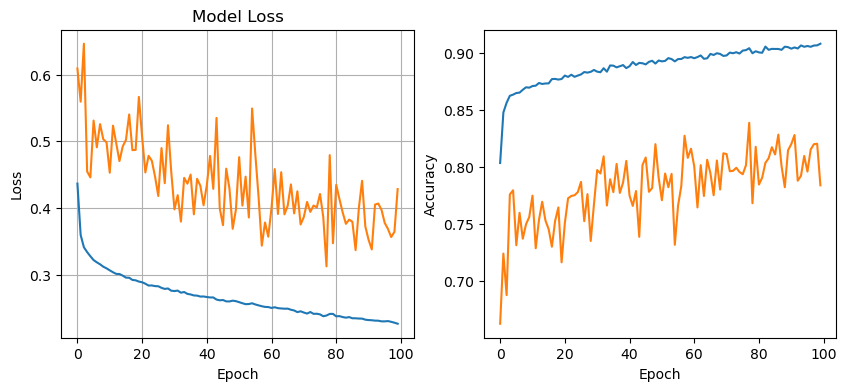

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.8711 - loss: 0.3398
 nodes 64, dropout 0, lr 0.001, batchsize 128


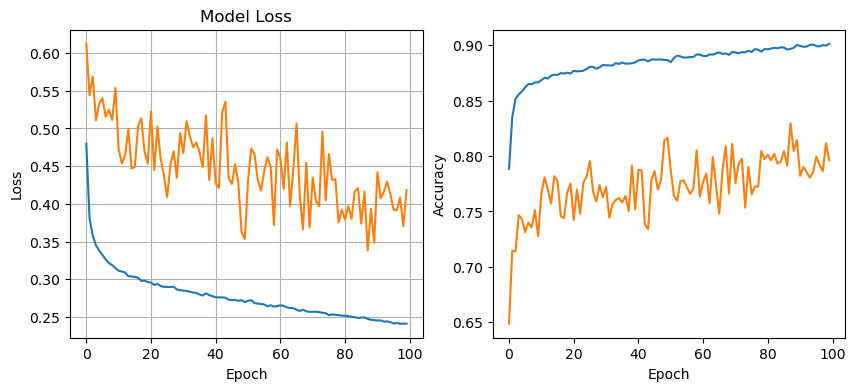

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.8603 - loss: 0.3503
 nodes 64, dropout 0.2, lr 0.001, batchsize 32


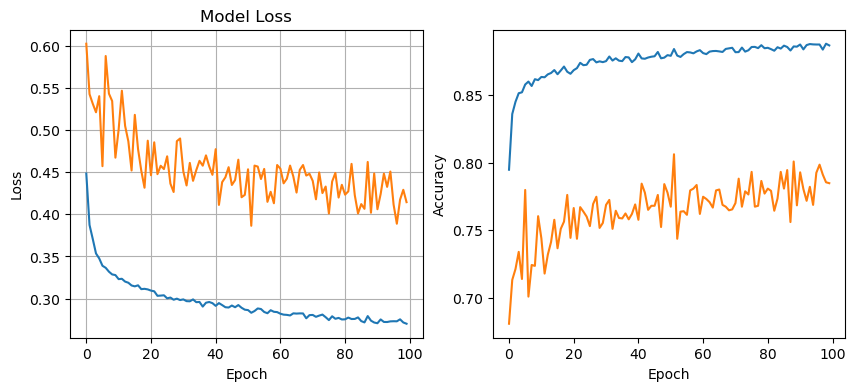

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.8702 - loss: 0.3109
 nodes 64, dropout 0.2, lr 0.001, batchsize 64


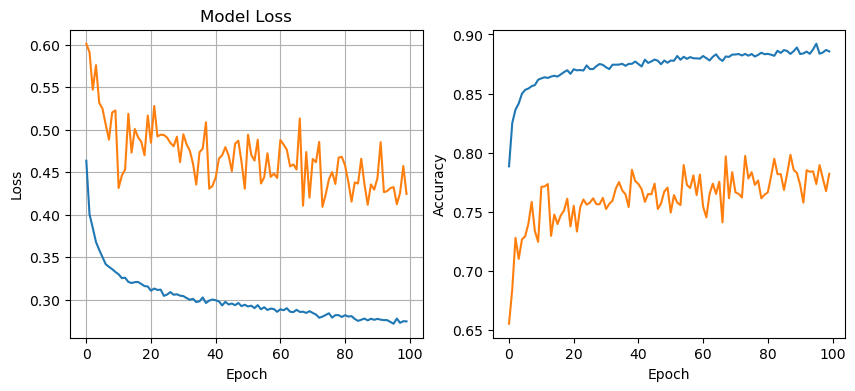

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.8654 - loss: 0.3127
 nodes 64, dropout 0.2, lr 0.001, batchsize 128


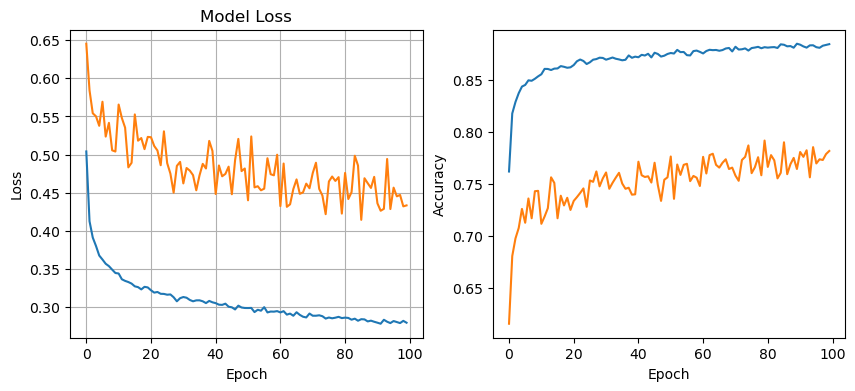

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.8642 - loss: 0.3143
Best hyperparameters: {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 32}
Best validation loss: 0.302283376455307


In [145]:
least_val_loss = float('inf')
least_loss_model = None 
best_hyperparameters = {}
epochs =100
for num_nodes in [16,32,64]:
    for lr in [0.01, 0.005, 0.001]:
        for dropout_prob in [0, 0.2]:
            for batch_size in [32, 64, 128]:
                print(f" nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batchsize {batch_size}")
                model, history = train_model(X_train, y_train, epochs, num_nodes, lr, dropout_prob, batch_size)
                plot_loss(history)
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model 
                    best_hyperparameters = {'learning_rate': lr, 'epochs': epochs, 'batch_size': batch_size}
                
print("Best hyperparameters:", best_hyperparameters)
print("Best validation loss:", least_val_loss)               

In [149]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int). reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


array([1, 1, 1, ..., 0, 1, 0])

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1374
           1       0.87      0.94      0.90      2430

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [151]:
print(accuracy_score(y_test,y_pred))

0.8698738170347003


### I've used several models here for classification problems and including a NN. NN maynot be a necessary for this model considering SVM did a whole lot better than NN in this instance. However, I didn't add any parameters for any of the model added in the notebook with the exception of NN model. 

### Conclusion: SVM is the best fit model for this problem. 